### Dataset Description
#### battery_power:Total energy a battery can store in one time measured in mAh
#### blue:Has bluetooth or not
#### clock_speed:speed at which microprocessor executes instructions
#### dual_sim:Has dual sim support or not
#### fc:Front Camera mega pixels
#### four_g:Has 4G or not
#### int_memory:Internal Memory in Gigabytes
#### m_dep:Mobile Depth in cm
#### mobile_wt:Weight of mobile phone
#### n_cores:Number of cores of processor
#### pc:Primary Camera mega pixels
#### px_height:Pixel Resolution Height
#### px_width:Pixel Resolution Width
#### ram:Random Access Memory in Megabytes
#### sc_h:Screen Height of mobile in cm
#### sc_w:Screen Width of mobile in cm
#### talk_time:longest time that a single battery charge will last when you are
#### three_g:Has 3G or not
#### touch_screen:Has touch screen or not
#### wifi:Has wifi or not

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB , ComplementNB , BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sn

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [3]:
df = pd.read_csv('mobile_price.csv')

In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1864,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1865,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1866,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1868 non-null   int64  
 1   blue           1868 non-null   int64  
 2   clock_speed    1868 non-null   float64
 3   dual_sim       1868 non-null   int64  
 4   fc             1868 non-null   int64  
 5   four_g         1868 non-null   int64  
 6   int_memory     1868 non-null   int64  
 7   m_dep          1868 non-null   float64
 8   mobile_wt      1868 non-null   int64  
 9   n_cores        1868 non-null   int64  
 10  pc             1868 non-null   int64  
 11  px_height      1868 non-null   int64  
 12  px_width       1868 non-null   int64  
 13  ram            1868 non-null   int64  
 14  sc_h           1868 non-null   int64  
 15  sc_w           1868 non-null   int64  
 16  talk_time      1868 non-null   int64  
 17  three_g        1868 non-null   int64  
 18  touch_sc

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
#uniquness 
df = df.drop_duplicates(keep='first')

In [8]:
#calculates the standard deviation for each column
df.var()

battery_power    1.940328e+05
blue             2.501199e-01
clock_speed      6.651856e-01
dual_sim         2.500075e-01
fc               1.896449e+01
four_g           2.496978e-01
int_memory       3.298053e+02
m_dep            8.362956e-02
mobile_wt        1.250432e+03
n_cores          5.208765e+00
pc               3.672535e+01
px_height        1.943569e+05
px_width         1.863430e+05
ram              1.179635e+06
sc_h             1.770302e+01
sc_w             1.911704e+01
talk_time        2.969257e+01
three_g          1.815698e-01
touch_screen     2.501199e-01
wifi             2.500992e-01
price_range      1.256970e+00
dtype: float64

In [9]:
df_copy = df.copy()
# apply normalization 
df_copy['battery_power'] = np.log(df_copy['battery_power'])
df_copy['ram'] = np.log(df_copy['ram'])
df_copy['ram'].var()

0.45332092520108164

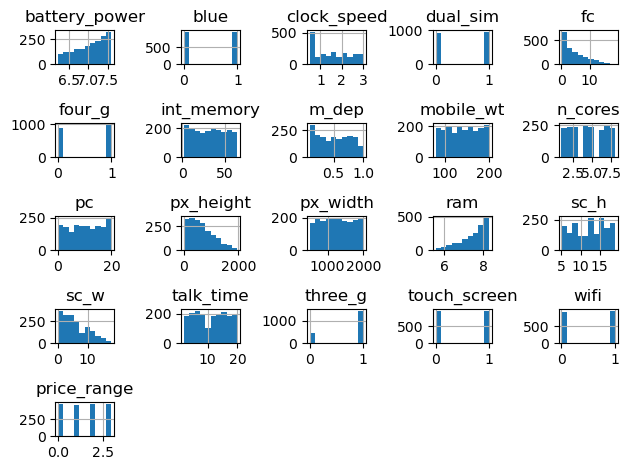

In [10]:
#visualizations
df_copy.hist()
plt.tight_layout()
plt.show()

In [11]:
df_copy.corr().style.background_gradient(cmap='coolwarm')
#heatmap

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.001413,0.020456,-0.049511,0.026223,0.025281,-0.001735,0.031884,0.001677,-0.031924,0.026128,0.020664,-0.006313,-0.013463,-0.031406,-0.010471,0.057495,0.019003,-0.009385,-0.006873,0.186452
blue,0.001413,1.000000,0.030903,0.036581,0.006459,0.006743,0.040214,0.006332,-0.015412,0.028193,-0.006214,-0.003640,-0.046270,0.028379,0.002207,0.007674,0.026837,-0.038122,0.012905,-0.021327,0.019180
clock_speed,0.020456,0.030903,1.000000,0.008274,0.002758,-0.043033,0.008364,-0.017871,0.016073,-0.007251,-0.005963,-0.016413,-0.015027,0.005252,-0.022934,-0.000871,-0.011193,-0.043646,0.026350,-0.023387,-0.008084
dual_sim,-0.049511,0.036581,0.008274,1.000000,-0.039798,0.003348,-0.008771,-0.024186,-0.009099,-0.037660,-0.020418,-0.024888,0.009264,0.042978,-0.016806,-0.020332,-0.051826,-0.008792,-0.006594,0.016871,0.020795
fc,0.026223,0.006459,0.002758,-0.039798,1.000000,-0.007288,-0.025435,-0.001123,0.029354,-0.017503,0.648368,-0.008403,-0.000051,0.020468,-0.006964,-0.008405,-0.016715,0.012668,-0.012853,0.033557,0.023938
four_g,0.025281,0.006743,-0.043033,0.003348,-0.007288,1.000000,0.016391,0.000540,-0.012752,-0.025098,-0.003326,-0.012581,0.004412,0.007277,0.033987,0.040282,-0.048480,0.583072,0.018976,-0.019782,0.026351
int_memory,-0.001735,0.040214,0.008364,-0.008771,-0.025435,0.016391,1.000000,0.010962,-0.035493,-0.021435,-0.031287,0.018258,0.000432,0.020264,0.039243,0.012372,0.015422,-0.001810,-0.022758,0.009454,0.045992
m_dep,0.031884,0.006332,-0.017871,-0.024186,-0.001123,0.000540,0.010962,1.000000,0.022064,-0.009600,0.034092,0.012780,0.016782,0.006958,-0.037200,-0.027949,0.011818,-0.008174,-0.007813,-0.031907,0.007716
mobile_wt,0.001677,-0.015412,0.016073,-0.009099,0.029354,-0.012752,-0.035493,0.022064,1.000000,-0.022999,0.034604,-0.007695,-0.000208,-0.009438,-0.038955,-0.023617,0.008715,0.001044,-0.026959,0.001599,-0.036415
n_cores,-0.031924,0.028193,-0.007251,-0.037660,-0.017503,-0.025098,-0.021435,-0.009600,-0.022999,1.000000,0.000406,-0.011111,0.021133,0.012599,0.011769,0.029898,0.011042,-0.014043,0.030465,-0.004282,0.004765


# Check for outliers

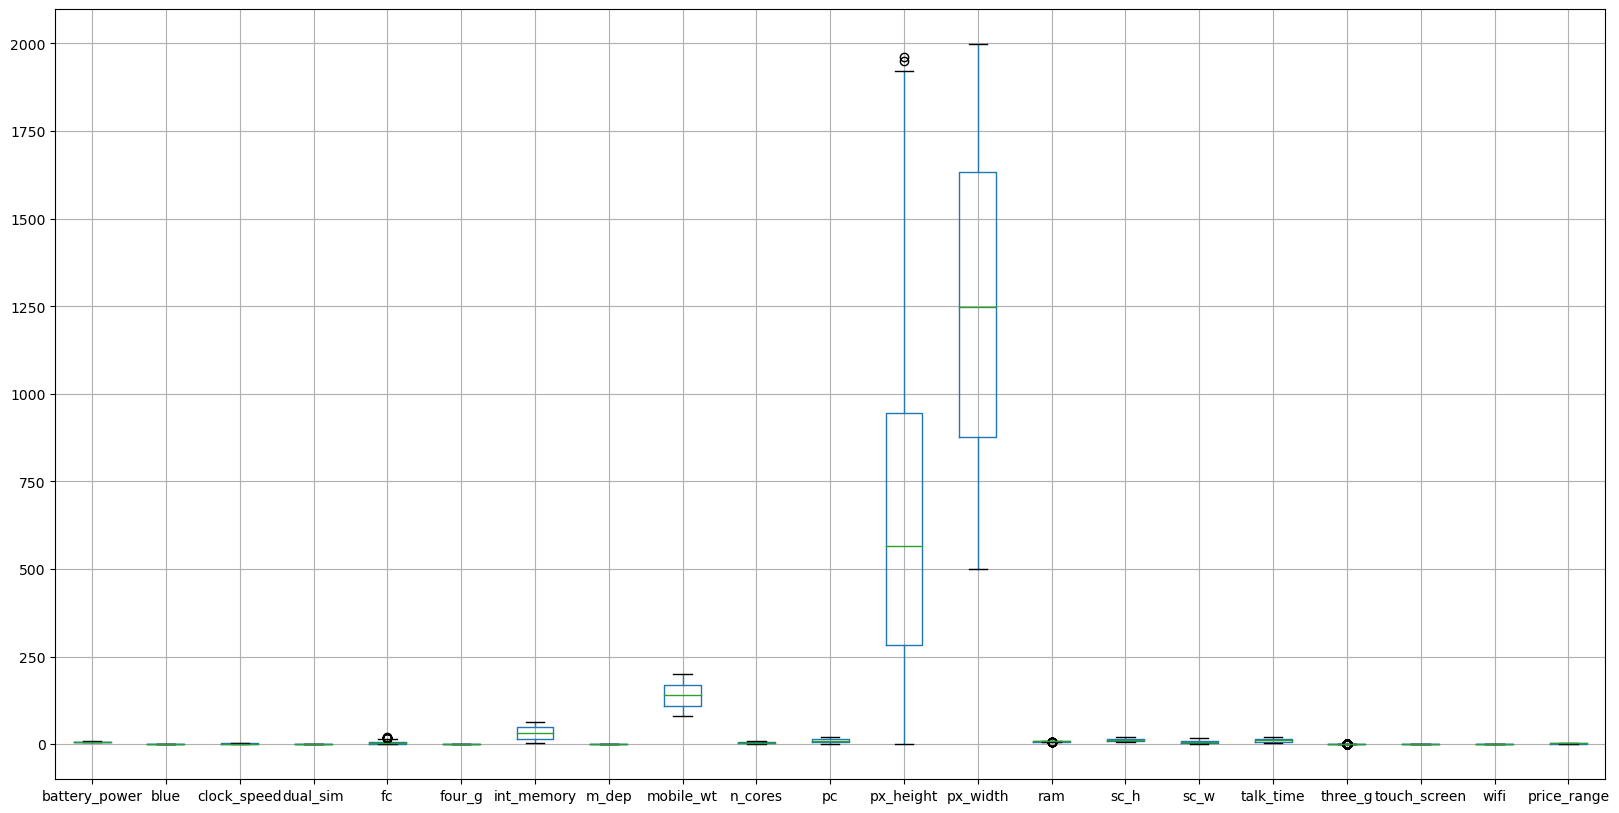

In [12]:
df_copy.boxplot(figsize=(20,10))
plt.show()

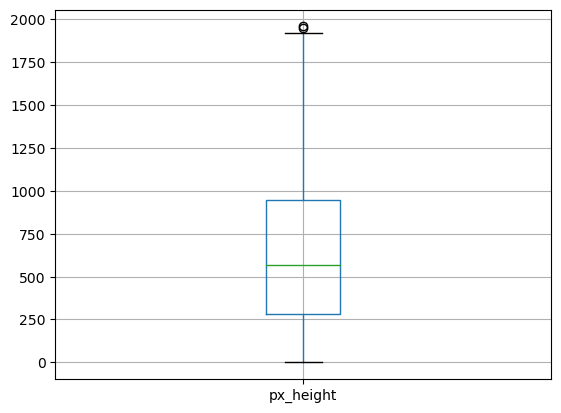

In [13]:
df_copy.boxplot('px_height')
plt.xticks()
plt.show()

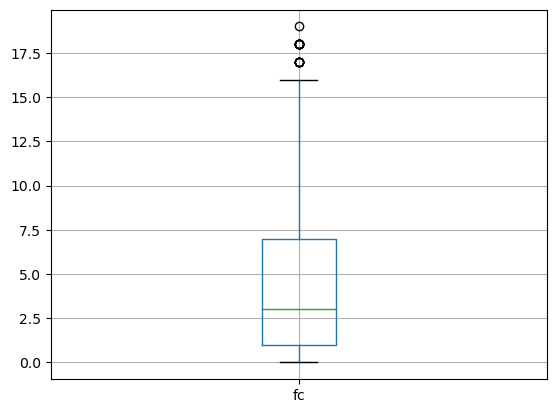

In [14]:
df_copy.boxplot('fc')
plt.xticks()
plt.show()

In [15]:
#removing outliers
px_height_q25, px_height_q75=df_copy.px_height.quantile(0.25), df_copy.px_height.quantile(0.75)
px_height_IQR = px_height_q75 - px_height_q25
fc_q25, fc_q75 = df_copy.fc.quantile(0.25), df_copy.fc.quantile(0.75)
fc_IQR = fc_q75 - fc_q25

px_height_lower, px_height_upper = px_height_q25 - (1.5 * px_height_IQR), px_height_q75 + (1.5 * px_height_IQR)
fc_lower, fc_upper = fc_q25 - (1.5 * fc_IQR), fc_q75 + (1.5 * fc_IQR)
df_copy.drop(df_copy[(df_copy['fc'] >= fc_upper) | (df_copy['fc'] <= fc_lower)].index, axis = 0, inplace=True)
df_copy.drop(df_copy[(df_copy['px_height'] >= px_height_upper) | (df_copy['px_height'] <= px_height_lower)].index, axis = 0, inplace=True)

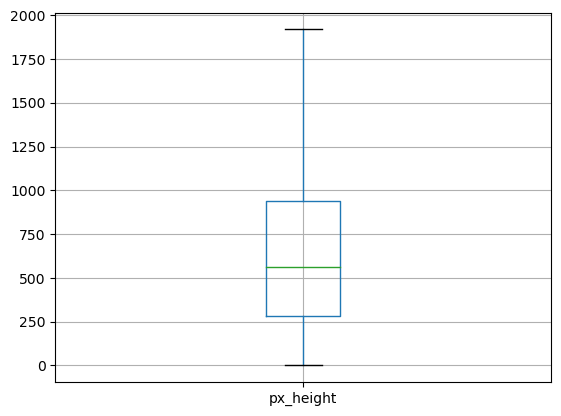

In [16]:
df_copy.boxplot('px_height')
plt.xticks()
plt.show()

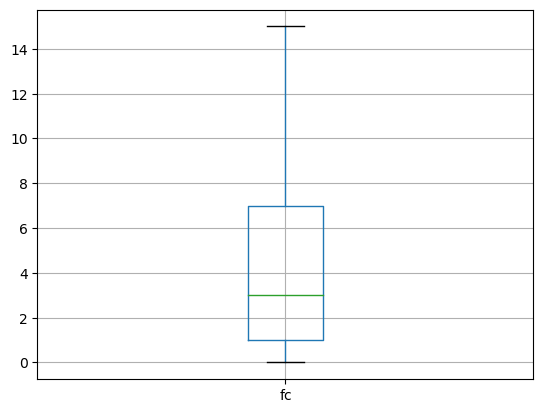

In [17]:
df_copy.boxplot('fc')
plt.xticks()
plt.show()

# Split Data

In [19]:
X = df_copy.drop(['price_range'], axis=1)
Y = df_copy['price_range']

In [20]:
x, x_test, y, y_test = train_test_split(X , Y , test_size=0.3, random_state=0)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=0)

In [21]:
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('------------------------')
print('X_val:', x_val.shape)
print('y_val:', y_val.shape)
print('------------------------')
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

X_train: (895, 20)
y_train: (895,)
------------------------
X_val: (384, 20)
y_val: (384,)
------------------------
X_test: (549, 20)
y_test: (549,)


# Check for imblanced data

In [22]:
y_train.value_counts()

3    238
2    223
1    218
0    216
Name: price_range, dtype: int64

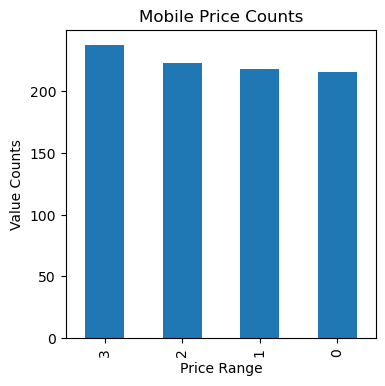

In [23]:
y_train.value_counts().plot(kind='bar', figsize=(4,4))
plt.xlabel('Price Range')  #0 for low cost,1 for medium , 2 for high , 3 for very high
plt.ylabel("Value Counts")
plt.title('Mobile Price Counts')
plt.show()

# Helper Functions

In [24]:
def evaluate_model(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_val = model.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

In [25]:
def plot_conf_matrix(model, X_val, y_val):
    y_pred_val = model.predict(X_val)
    cf = confusion_matrix(y_val, y_pred_val)
    cf_row_sum = cf.sum(axis=1, keepdims=True)
    cf_normalized = cf/cf_row_sum
    sn.heatmap(cf_normalized, annot=True, cmap='Blues')
    plt.show()
    return cf

# KNeighborsClassifier Model

In [26]:
#Hyper-parameter tuning (n_neighbors)
n_neighbors_values = list(range(1, 30))
acc_train_values = []
acc_val_values = []

for n_neighbors in n_neighbors_values:
    model = Pipeline([
    ('fs', StandardScaler()),#scalling
    ('model',KNeighborsClassifier(n_neighbors=n_neighbors))   #model 
    ])
    acc_train, acc_val = evaluate_model(model, x_train, y_train, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

results_n_neighbors = pd.DataFrame({
    'n_neighbors': n_neighbors_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_n_neighbors

,n_neighbors,acc_train,acc_val
0,1,1.000000,0.427083
1,2,0.719553,0.416667
2,3,0.701676,0.408854
3,4,0.703911,0.429688
4,5,0.698324,0.450521
5,6,0.688268,0.460938
6,7,0.653631,0.497396
7,8,0.667039,0.494792
8,9,0.683799,0.481771
9,10,0.662570,0.507812


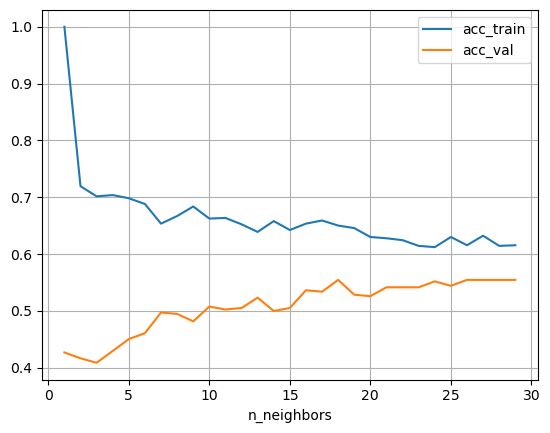

In [27]:
results_n_neighbors.plot(x='n_neighbors', y=['acc_train', 'acc_val'])
plt.grid()
plt.show()

In [28]:
model = Pipeline([
    ('fs', StandardScaler()),#scalling
    ('model',KNeighborsClassifier(n_neighbors=24))#model 
])


acc_train1,acc_val1=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train1,acc_val1)

0.6122905027932961 0.5520833333333334


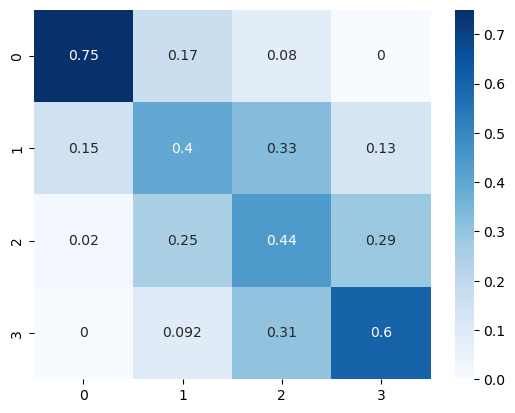

array([[75, 17,  8,  0],
       [13, 34, 28, 11],
       [ 2, 25, 44, 29],
       [ 0,  9, 30, 59]], dtype=int64)

In [29]:
plot_conf_matrix(model, x_val, y_val)

# GaussianNB Model 

In [30]:
# Storing models in a list to loop through them
models_list = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
]

# creating a dictionary to store results
results_dict = {
    'model_name': [],
    'acc_train': [],
    'acc_val': [],
}

# for each model
for models in models_list:
    model = Pipeline([
    ('fs', MinMaxScaler()) ,#scalling
    ('model',models) #model 
])
    # evaluate the model and calculate acc_train and acc_val
    acc_train, acc_val = evaluate_model(
        model,
        x_train,
        y_train,
        x_val,
        y_val
    )

    # storing results in results_dict
    results_dict['model_name'].append(models.__class__.__name__)
    results_dict['acc_train'].append(acc_train)
    results_dict['acc_val'].append(acc_val)

# converting results_dict to a DataFrame
results_df = pd.DataFrame(results_dict)
results_df

,model_name,acc_train,acc_val
0,GaussianNB,0.812291,0.776042
1,MultinomialNB,0.497207,0.411458
2,ComplementNB,0.511732,0.445312
3,BernoulliNB,0.326257,0.257812


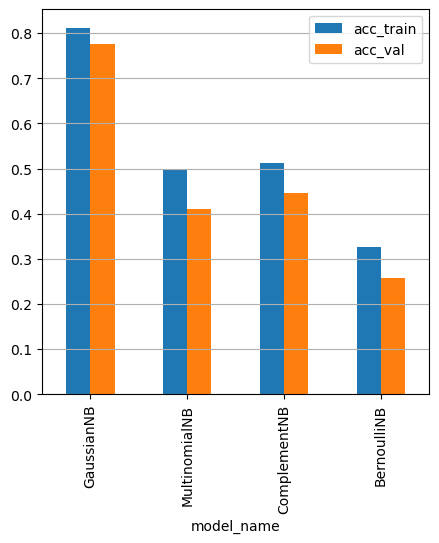

In [31]:
results_df.plot.bar(x='model_name', y=['acc_train', 'acc_val'], figsize=(5, 5))
plt.grid(axis='y')
plt.show()

In [32]:
model = Pipeline([
    ('fs', StandardScaler()),#scalling
    ('model',GaussianNB())#model 
])
acc_train2,acc_val2=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train2,acc_val2)

0.8122905027932961 0.7760416666666666


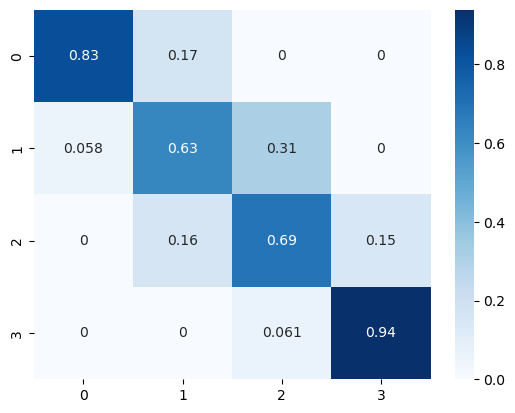

array([[83, 17,  0,  0],
       [ 5, 54, 27,  0],
       [ 0, 16, 69, 15],
       [ 0,  0,  6, 92]], dtype=int64)

In [33]:
plot_conf_matrix(model, x_val, y_val)

# DecisionTreeClassifier Model

In [34]:
#Hyper-parameter tuning (max_depth)
max_depth_values = list(range(1, 10))
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    model = Pipeline([
    ('fs', StandardScaler()),#scalling
    ('model',DecisionTreeClassifier(max_depth=max_depth, random_state=0))  #model 
    ])
    acc_train, acc_val = evaluate_model(model, x_train, y_train, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

results_max_depth = pd.DataFrame({
    'max_depth': max_depth_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_max_depth

,max_depth,acc_train,acc_val
0,1,0.507263,0.515625
1,2,0.777654,0.750000
2,3,0.777654,0.750000
3,4,0.839106,0.778646
4,5,0.911732,0.820312
5,6,0.940782,0.822917
6,7,0.967598,0.791667
7,8,0.984358,0.812500
8,9,0.995531,0.802083


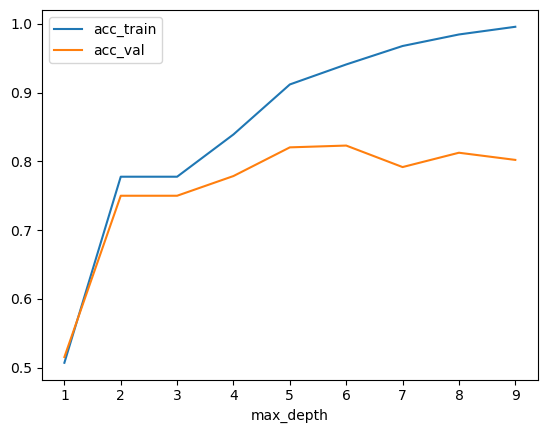

In [35]:
results_max_depth.plot(x='max_depth', y=['acc_train', 'acc_val'])
plt.show()

In [36]:
model = Pipeline([
    ('fs', StandardScaler()),#scalling
    ('model',DecisionTreeClassifier(max_depth=3, random_state=0)) #model 
])
acc_train3,acc_val3=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train3,acc_val3)

0.7776536312849162 0.75


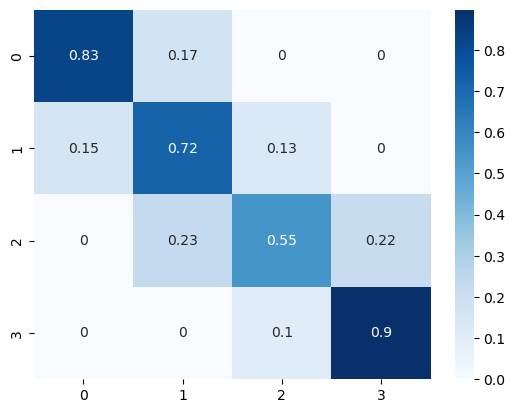

array([[83, 17,  0,  0],
       [13, 62, 11,  0],
       [ 0, 23, 55, 22],
       [ 0,  0, 10, 88]], dtype=int64)

In [37]:
plot_conf_matrix(model, x_val, y_val)

# SVC Model

In [38]:
model = Pipeline([
    ('fs', StandardScaler()),#scalling
    ('model',SVC(C=10, kernel='linear',random_state=0))#model 
])
acc_train4,acc_val4=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train4,acc_val4)

0.9608938547486033 0.9270833333333334


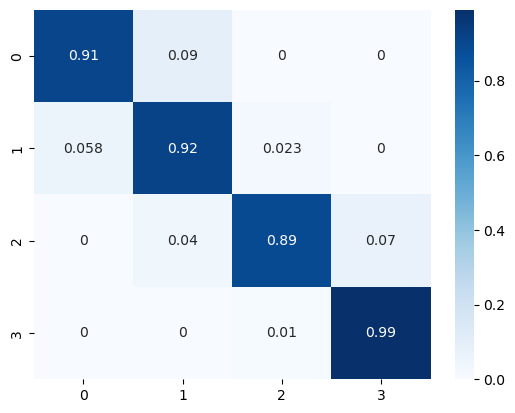

array([[91,  9,  0,  0],
       [ 5, 79,  2,  0],
       [ 0,  4, 89,  7],
       [ 0,  0,  1, 97]], dtype=int64)

In [39]:
plot_conf_matrix(model, x_val, y_val)

# RandomForestClassifier Model

In [40]:
rf=RandomForestClassifier()
param_grid = {
    'n_estimators' : [10, 50, 100, 200, 300, 400, 500],
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
}

grid_search = GridSearchCV(rf, param_grid, cv=5,return_train_score=True)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'max_depth': 9, 'n_estimators': 300}

In [41]:
model = Pipeline([
    ('fs', StandardScaler()),#scalling
    ('model',  RandomForestClassifier(n_estimators=300, max_depth=9, random_state=0)) #model 
])
acc_train5,acc_val5=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train5,acc_val5)

1.0 0.84375


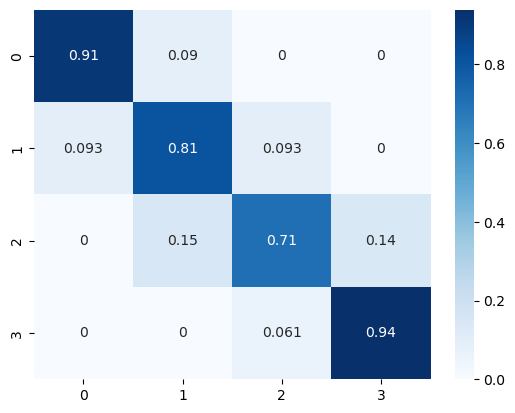

array([[91,  9,  0,  0],
       [ 8, 70,  8,  0],
       [ 0, 15, 71, 14],
       [ 0,  0,  6, 92]], dtype=int64)

In [42]:
plot_conf_matrix(model, x_val, y_val)

# LogisticRegression Model

In [43]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
acc_train_values = []
acc_val_values = []

for C in C_values:
    model = Pipeline([
        ('fs', StandardScaler()),
        ('model', LogisticRegression(C=C, random_state=0))
    ])
    acc_train, acc_val = evaluate_model(model, x_train, y_train, x_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)

results = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values
})

results

,C,acc_train,acc_val
0,0.0001,0.349721,0.328125
1,0.0010,0.595531,0.583333
2,0.0100,0.753073,0.687500
3,0.1000,0.881564,0.802083
4,1.0000,0.948603,0.898438
5,10.0000,0.964246,0.921875
6,100.0000,0.969832,0.934896
7,1000.0000,0.972067,0.945312
8,10000.0000,0.973184,0.942708


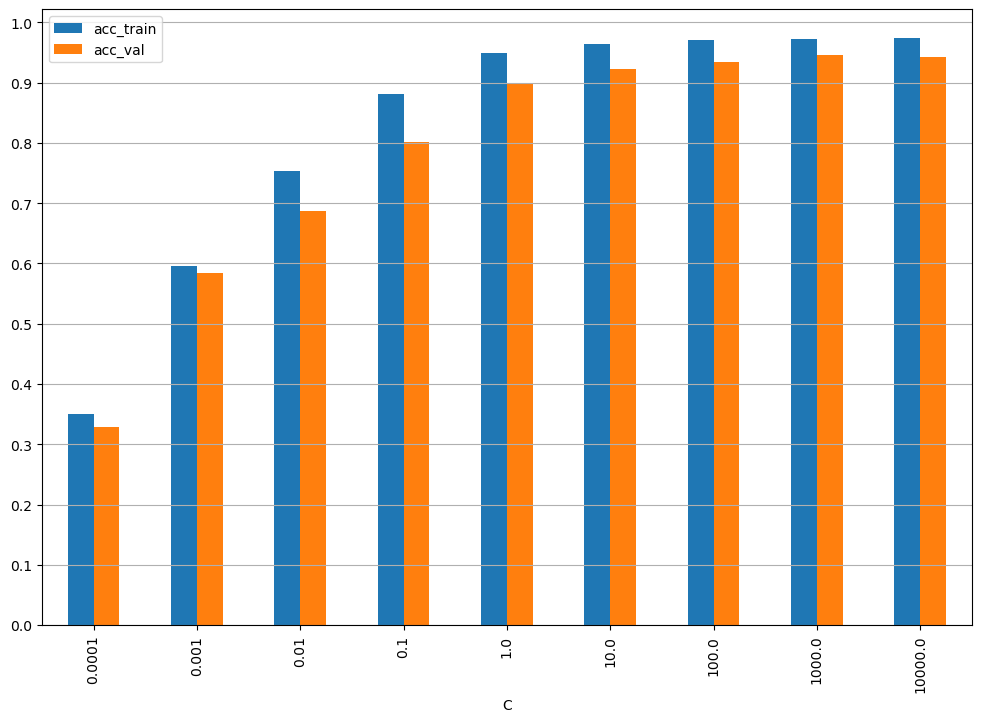

In [44]:
results.plot.bar(x='C', y=['acc_train', 'acc_val'], figsize=(12, 8))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

In [45]:
model = Pipeline([
        ('fs', StandardScaler()),
        ('model', LogisticRegression(C=1000, random_state=0))
    ])
acc_train6,acc_val6=evaluate_model(model, x_train, y_train, x_val, y_val)
print(acc_train6,acc_val6)

0.9720670391061452 0.9453125


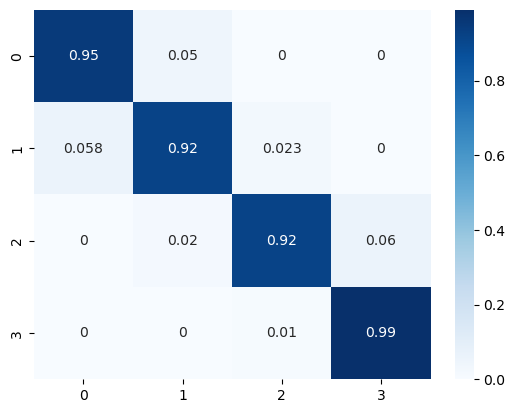

array([[95,  5,  0,  0],
       [ 5, 79,  2,  0],
       [ 0,  2, 92,  6],
       [ 0,  0,  1, 97]], dtype=int64)

In [46]:
plot_conf_matrix(model, x_val, y_val)

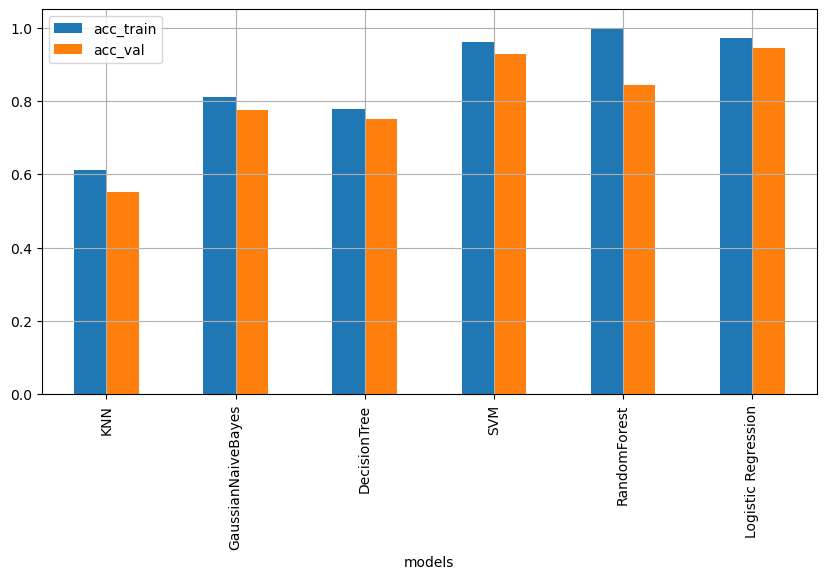

In [47]:
models = ['KNN','GaussianNaiveBayes','DecisionTree','SVM','RandomForest','Logistic Regression']
acc_train_values=[acc_train1,acc_train2,acc_train3,acc_train4,acc_train5,acc_train6]
acc_val_values=[acc_val1,acc_val2,acc_val3,acc_val4,acc_val5,acc_val6]

results = pd.DataFrame({
    'models': models,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results.plot(x='models', y=['acc_train', 'acc_val'],kind='bar',figsize=(10,5))
plt.grid(axis='both')
plt.show()

In [50]:
model_best = Pipeline([
        ('fs', StandardScaler()),
        ('model', LogisticRegression(C=1000, random_state=0))
    ])
model_best.fit(x_train, y_train)
y_pred_test = model_best.predict(x_test)
print(accuracy_score(y_test, y_pred_test))

0.9253187613843351


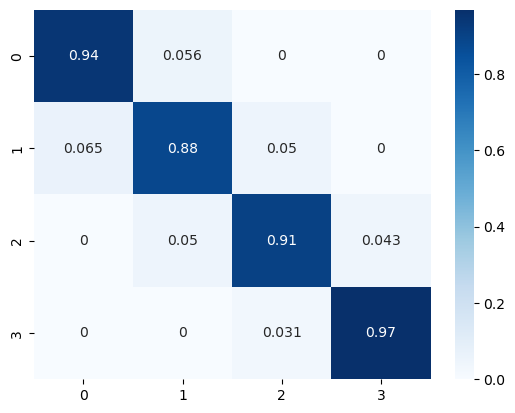

array([[135,   8,   0,   0],
       [  9, 123,   7,   0],
       [  0,   7, 126,   6],
       [  0,   0,   4, 124]], dtype=int64)

In [51]:
plot_conf_matrix(model_best, x_test, y_test)